In [1]:
# Instalamos librerias necesarias
# %pip install unidecode

# Importamos librerias necesarias
import numpy as np
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import re 
import plotly.express as px

In [3]:
# Leemos los datos
data1 = pd.read_csv("../data/denue_inegi_46111_.csv", index_col="id",
                   encoding='latin-1')
data2 = pd.read_csv("../data/denue_inegi_46112-46311_.csv", index_col="id",
                   encoding='latin-1')
data3 = pd.read_csv("../data/denue_inegi_46321-46531_.csv", index_col="id",
                   encoding='latin-1')
data4 = pd.read_csv("../data/denue_inegi_46591-46911_.csv", index_col="id",
                   encoding='latin-1')

antad = pd.read_csv("../data/empresas_antad.csv")

data = pd.concat([data1, data2, data3, data4], ignore_index=True)

/var/folders/_n/15dj3g9532b7lqmq3dcy_1jw0000gp/T/ipykernel_86866/2714462107.py:2: DtypeWarning: Columns (35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("../data/denue_inegi_46111_.csv", index_col="id",
/var/folders/_n/15dj3g9532b7lqmq3dcy_1jw0000gp/T/ipykernel_86866/2714462107.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("../data/denue_inegi_46112-46311_.csv", index_col="id",
/var/folders/_n/15dj3g9532b7lqmq3dcy_1jw0000gp/T/ipykernel_86866/2714462107.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("../data/denue_inegi_46321-46531_.csv", index_col="id",
/var/folders/_n/15dj3g9532b7lqmq3dcy_1jw0000gp/T/ipykernel_86866/2714462107.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv("../data/denue_

In [4]:
def extract_average(range_str):
    if 'y más' in range_str:
        # Para 251 y más
        return 251
    else:
        # Extraemos para cada string
        numbers = [int(s) for s in range_str.split() if s.isdigit()]
        return sum(numbers) / len(numbers)

data['per_ocu'] = data['per_ocu'].apply(extract_average)

In [5]:
empresas = data.groupby('raz_social')['per_ocu'].sum().reset_index()

In [6]:
antad

,Nombre Comercial,Razón social,Formato,Especialización
0,ALSUPER,OPERADORA FUTURAMA S.A. DE C.V.,Autoservicio,NaN
1,CASA LEY,CASA LEY S.A.P.I. DE C.V.,Autoservicio,NaN
2,CENTRO COMERCIAL CRUZ AZUL,CENTRO COMERCIAL CRUZ AZUL S.A. DE C.V.,Autoservicio,NaN
3,CHEDRAUI,TIENDAS CHEDRAUI S.A. DE C.V.,Autoservicio,NaN
4,LA COMER,COMERCIAL CITY FRESKO S. DE R.L. DE C.V,Autoservicio,NaN
...,...,...,...,...
88,STEREN,ELECTRÓNICA STEREN S.A. DE C.V.,Especializada,Tienda de Electrónica
89,SFERA MODA JOVEN,OPERADORA SFERA JOVEN MEXICO SA DE CV,Especializada,Tienda de Ropa
90,SUPER NATURISTA,SUPER MAYOREO NATURISTA S.A. DE C.V.,Especializada,Tienda de Alimentos Saludables
91,CARTERS,CARTERS BRANDS S.A. DE C.V.,Especializada,Tienda de Ropa Infantil


In [7]:
def limpia_nombre(name):
    name = name.replace("R. L.", "RL")
    # Quitamos acentos
    name = unidecode(name)
    # Limpiamos en general
    name = re.sub(r"[^\w\s&]", "", name)
    # Quitamos puntos
    name = name.replace('.', '').upper()
    name = name.strip()
    return name

# Limpiamos el nombre del segundo data set
antad['raz_social'] = antad['Razón social'].apply(limpia_nombre)
empresas['raz_social'] = empresas['raz_social'].apply(limpia_nombre)

# Hacemos el join
merge = antad.merge(empresas[['raz_social', 'per_ocu']], 
                      on='raz_social', 
                      how='inner')

# Renombramos la columna
merge = merge.rename(columns={'per_ocu': 'total_personas'})

In [8]:
merge

,Nombre Comercial,Razón social,Formato,Especialización,raz_social,total_personas
0,ALSUPER,OPERADORA FUTURAMA S.A. DE C.V.,Autoservicio,NaN,OPERADORA FUTURAMA SA DE CV,13471.5
1,CASA LEY,CASA LEY S.A.P.I. DE C.V.,Autoservicio,NaN,CASA LEY SAPI DE CV,22667.5
2,CENTRO COMERCIAL CRUZ AZUL,CENTRO COMERCIAL CRUZ AZUL S.A. DE C.V.,Autoservicio,NaN,CENTRO COMERCIAL CRUZ AZUL SA DE CV,527.5
3,CHEDRAUI,TIENDAS CHEDRAUI S.A. DE C.V.,Autoservicio,NaN,TIENDAS CHEDRAUI SA DE CV,46960.5
4,LA COMER,COMERCIAL CITY FRESKO S. DE R.L. DE C.V,Autoservicio,NaN,COMERCIAL CITY FRESKO S DE RL DE CV,14539.0
...,...,...,...,...,...,...
86,STEREN,ELECTRÓNICA STEREN S.A. DE C.V.,Especializada,Tienda de Electrónica,ELECTRONICA STEREN SA DE CV,114.0
87,SFERA MODA JOVEN,OPERADORA SFERA JOVEN MEXICO SA DE CV,Especializada,Tienda de Ropa,OPERADORA SFERA JOVEN MEXICO SA DE CV,686.5
88,SUPER NATURISTA,SUPER MAYOREO NATURISTA S.A. DE C.V.,Especializada,Tienda de Alimentos Saludables,SUPER MAYOREO NATURISTA SA DE CV,217.5
89,CARTERS,CARTERS BRANDS S.A. DE C.V.,Especializada,Tienda de Ropa Infantil,CARTERS BRANDS SA DE CV,364.5


In [10]:

bins = [0, 10, 50, 250, float('inf')]
labels = ['Micro', 'Pequeña', 'Mediana', 'Grande']

merge['tamaño'] = pd.cut(merge['total_personas'], bins=bins, labels=labels, include_lowest=True)

In [11]:
merge.drop_duplicates(subset=['raz_social'], keep='first')

,Nombre Comercial,Razón social,Formato,Especialización,raz_social,total_personas,tamaño
0,ALSUPER,OPERADORA FUTURAMA S.A. DE C.V.,Autoservicio,NaN,OPERADORA FUTURAMA SA DE CV,13471.5,Grande
1,CASA LEY,CASA LEY S.A.P.I. DE C.V.,Autoservicio,NaN,CASA LEY SAPI DE CV,22667.5,Grande
2,CENTRO COMERCIAL CRUZ AZUL,CENTRO COMERCIAL CRUZ AZUL S.A. DE C.V.,Autoservicio,NaN,CENTRO COMERCIAL CRUZ AZUL SA DE CV,527.5,Grande
3,CHEDRAUI,TIENDAS CHEDRAUI S.A. DE C.V.,Autoservicio,NaN,TIENDAS CHEDRAUI SA DE CV,46960.5,Grande
4,LA COMER,COMERCIAL CITY FRESKO S. DE R.L. DE C.V,Autoservicio,NaN,COMERCIAL CITY FRESKO S DE RL DE CV,14539.0,Grande
...,...,...,...,...,...,...,...
86,STEREN,ELECTRÓNICA STEREN S.A. DE C.V.,Especializada,Tienda de Electrónica,ELECTRONICA STEREN SA DE CV,114.0,Mediana
87,SFERA MODA JOVEN,OPERADORA SFERA JOVEN MEXICO SA DE CV,Especializada,Tienda de Ropa,OPERADORA SFERA JOVEN MEXICO SA DE CV,686.5,Grande
88,SUPER NATURISTA,SUPER MAYOREO NATURISTA S.A. DE C.V.,Especializada,Tienda de Alimentos Saludables,SUPER MAYOREO NATURISTA SA DE CV,217.5,Mediana
89,CARTERS,CARTERS BRANDS S.A. DE C.V.,Especializada,Tienda de Ropa Infantil,CARTERS BRANDS SA DE CV,364.5,Grande


Distribution de los tamaños
Grande     71
Mediana    12
Pequeña     7
Micro       1
Name: tamaño, dtype: int64

Porcentaje que representa cada tamaño:
Grande     78.021978
Mediana    13.186813
Pequeña     7.692308
Micro       1.098901
Name: tamaño, dtype: float64


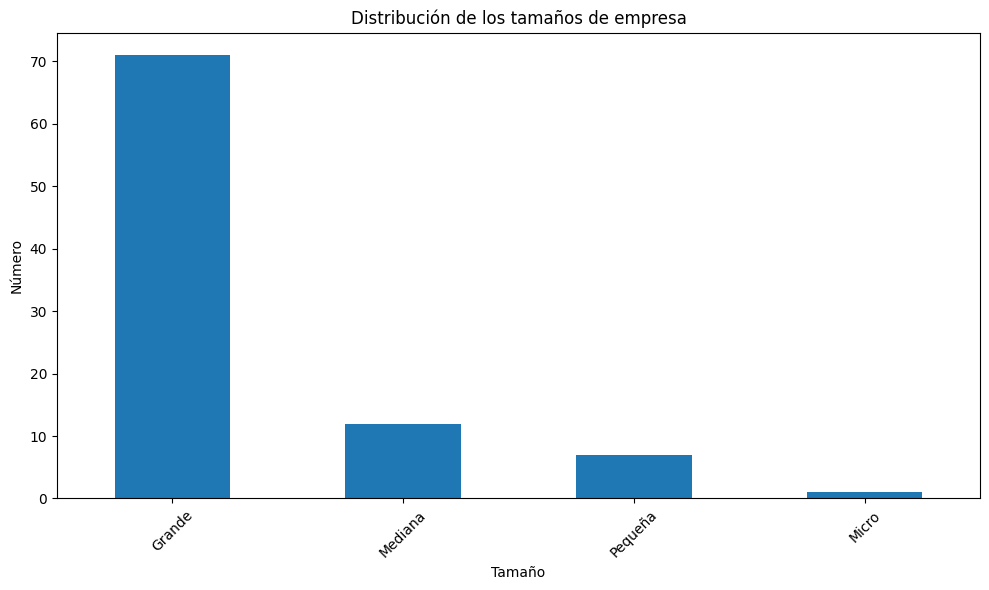

In [12]:
# Contamos cuantas empresas tenemos de cada tamaño
conteo = merge['tamaño'].value_counts()

print("Distribution de los tamaños")
print(conteo)

# Lo calculamos como porcentaje
size_percentages = merge['tamaño'].value_counts(normalize=True) * 100

print("\nPorcentaje que representa cada tamaño:")
print(size_percentages)

# Graficamos


plt.figure(figsize=(10, 6))
conteo.plot(kind='bar')
plt.title('Distribución de los tamaños de empresa')
plt.xlabel('Tamaño')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Hacemos la grafica con plotly
fig = px.bar(conteo, 
             x=conteo.index, 
             y=conteo.values, 
             labels={'x': 'Tamaño', 'y': 'Número'}, 
             title='Distribución de los tamaños de empresa',
             text=conteo.values)

fig.update_traces(textposition='outside', marker_color='orange')

fig.update_yaxes(range=[0, 80])

fig.update_layout(title_font_size=20, 
                  xaxis_tickangle=-45,
                  xaxis_title_font_size=16, 
                  yaxis_title_font_size=16, 
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide',
                  bargap=0.3)

fig.show()
